<a href="https://colab.research.google.com/github/DeOfficiis/Diabetes/blob/main/Wilfried_Bringmans_6333160.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The primary objective of the exam is to build a machine learning algorithm that can predict a diagnosis for diabetes in a patient based on several medical variables and one target variable: the outcome - either 0 or 1.

The machine learning algorithm will produce a sliding scale value between 0 and 1 with a cut-off point (linear regression) above which, the diagnosis will become positive for diabetes.

The solution is split into three parts.

1.   Data import and analysis, in which the data will be visualised and analysed to check for lacunes and anomalies, after which the dataset will be appropriate amended.  The amended dataset will be re-evaluated, to ensure it is fit for use in the machine learning model.
2.   Data exploration, in which possible correlations between the medical parameters and the outcome (0 or 1) will be explored.
3.   Machine Learning Model, which will include the results produced by the algorithm, and tests.

# Data Import and Characterisation

In [4]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

    # due to the issue with the initial database link provided with the exam, I put the database on my github, and carried on that.

diabetes_df = pd.read_csv('https://raw.githubusercontent.com/DeOfficiis/Diabetes/main/diabetes_df.csv')

    # alternative link
    # raw_data = pd.read_csv('https://raw.githubusercontent.com/LUCE-Blockchain/Databases-for-teaching/main/diabetes.csv')

diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
    # data types by column
diabetes_df.info()

In [ ]:
    #checking for null values
diabetes_df.isnull().sum()

**Conclusion**

Dataframe size: 768 x 9

All objects are either integers, or floats.

No NaN values

All columns are complete - apart from 0-values

## **0-values / anomalies / outliers**



In [ ]:
    # Cheking for minimum, maximum and mean
    # Checking number of individual in each class.

diabetes_df.describe()

**Conclusion**

There are a number of classes where 0-values are not possible.  We will deal with those later.

Every class has 768 indivuals.

In [ ]:
    # Distplot to show relation between glucose and outcome

sns.set_theme(style = 'ticks')
sns.displot(diabetes_df, x = 'Glucose', hue = 'Outcome', kind = 'kde', fill = True)

In [ ]:
    # explore influence of the classes on the 'Outcome'.

sns.set_theme(style="ticks")
for col in diabetes_df.columns:
  if col != "Outcome":
        sns.catplot(x = "Outcome", y = col, data = diabetes_df)

In [ ]:
    # explore influence of the classes on the 'Outcome'.

sns.set_theme(style="ticks")
for col in diabetes_df.columns:
  if col != "Outcome":
        sns.catplot(x = "Outcome", y = col, data = diabetes_df, kind = 'violin')

**Conclusion**

High readings in every class, increases the change of the individual to be diagnosed with Diabetes.

The mean for a positive diagnosis in any of the classes is above the mean for a negative diagnosis 

Glucose appears to have the highest influence on the outcome.

The scatterplot also shows there is more clustering for the values in most classes for the negative diagnosis, whereas values for a negative diagnosis, are less clustered.

## Replacing '0-values' and 'below threshold values' with the standard deviation

### Anaylsis and assumptions

The classes where 0-value are problematic are:

*   'Glucose'
*   'Bloodpressure'
*   'Skinthickness'
*   'Insulin'
*   'BMI'

Also, replace any value which is below a dangerously low level with the value of the mean.

**'Glucose':**
Any reading below 40 is replaced by the mean.  At the top-end, the violin plot above shows that the cluster reaches to 200.  Although dangerous for the patient, these readings should be taken as accurate.

**'BloodPressure':**
Any reading below 40 is replaced by the mean.  There is no need to reduce the readings above 120, as this is a common reading for patients suffering from high-bloodpressure.

**'SkinThickness':**
The 0-values are replaced with the value of the mean. The outlier of 'SkinThickness' is possibly accurate.  

**'Insulin' and 'BMI':**
The 0-values are replaced by the values of the mean.

Note;
The stated safe vs dangerous values have been taken from Wikipedia.
None of the values at the high-end are impossible.

**Outliers at the top-end of the data**

We can already guess that this is a regression problem.  At the Machine Learning stage we will be using a RandomForest Classifier.  One of the advantages RandomForests is that they automatically deal with outliers.

Having run the visualisations of the data above , we see that the outliers are not isolated cases and therefore none of the extremely high values will be taken as outliers, especially as they remain inside the range of the possible.

### Calculate the amendments

In [5]:
    # replacing value <40 in 'Glucose' and 'BloodPressure', with the mean value of that column
    # replacing value == 0 in 'SkinThickness', 'Insulin', and 'BMI', with the mean of those columns

    # the values in these 5 columns have been updated separately, to be sure the values updated as intended.

diabetes_df['Glucose'] = np.where(diabetes_df['Glucose'] < 40, diabetes_df['Glucose'].mean(), diabetes_df['Glucose'])
diabetes_df['BloodPressure'] = np.where(diabetes_df['BloodPressure'] < 40, diabetes_df['BloodPressure'].mean(), diabetes_df['BloodPressure'])
diabetes_df['SkinThickness'] = np.where(diabetes_df['SkinThickness'] == 0, diabetes_df['SkinThickness'].mean(), diabetes_df['SkinThickness'])
diabetes_df['Insulin'] = np.where(diabetes_df['Insulin'] == 0, diabetes_df['Insulin'].mean(), diabetes_df['Insulin'])
diabetes_df['BMI'] = np.where(diabetes_df['BMI'] == 0, diabetes_df['BMI'].mean(), diabetes_df['BMI'])

diabetes_df.describe()

    # the 0-values to mean have not been split yet.  (if there's time I do that)
    # you can see the benefit on the plot below.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.455877,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,11.729688,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,40.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
    # check if the 0-values have been amended.
diabetes_df.isnull().sum()

### Plot the amended data

In [ ]:
sns.set_theme(style="ticks")
for col in diabetes_df.columns:
  if col != "Outcome":
        sns.catplot(x = "Outcome", y = col, data = diabetes_df, kind = 'violin')

**Conclusion**

Plotting the amendeded data amplifies the previously conclusion regarding the values of the mean being lower for a negative diagnosis, than for a positive diagnosis.

## Summary Statistics 

In [6]:
    # description dataframe
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.455877,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,11.729688,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,40.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
    # value count of the dataframe
diabetes_df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [ ]:
    # value count per class
diabetes_df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
    # number of each in a class ('Pregnancies' per age)
diabetes_df.groupby('Pregnancies').size()

Pregnancies
0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
dtype: int64

# Data Exploration

Create a heatmap to spot relationships

In [ ]:
    # create heatmap to spot relationships
# sns.set_theme(style="ticks")
plt.figure(figsize=(9,6))
sns.heatmap(diabetes_df.corr(),cmap='Blues',annot=False)

CONCLUSION
*   'Glucose' is the strongest parameter with regards to the outcome.
*   'BMI' is the second strongest paramenter with regard to the outcome.
*   'Age' also plays a role, suggesting that increased age, increases the chances of developing Diabetes.
*   'Age' and 'Pregnacies' appear to be related to eachother; younger women appear to have been pregnant more often than young women.  This is counter intuitive; older women have had more time for more pregnancies
*   'SkinThickness' and 'BMI' are also related to eachother.

In [ ]:
    # Relationship between Patient (1) and Healty (0) in 'Outcome versus 'Glucose'
sns.set_theme(style = 'ticks')
sns.displot(diabetes_df, x = 'Glucose', hue = 'Outcome', kind = 'kde', fill = True, height = 4, aspect = 2.5).set(title = 'Relationship between Outcome and Levels of Glucose.')

**Note in the margin:**

This chart shows why a Glucose Concentration reading of over 140 serves as categoric positive diagnosis for diabetes.

In [ ]:
    # Boxplot showing Relationship 'Outcome versus 'Glucose'
    
sns.boxplot(x = 'Outcome', y = 'Glucose', data = diabetes_df).set(title = 'Relationship between Outcome and Levels of Glucose.')

In [ ]:
    # Boxplot showing Relationship 'Outcome versus 'BMI'
    
sns.boxplot(x = 'Outcome', y = 'BMI', data = diabetes_df).set(title = 'Relationship between Diagnosis and BMI.')

In [ ]:
    # Boxplot showing age distribution
    
sns.boxplot(x = 'Outcome', y = 'Age', data = diabetes_df).set(title = 'Age Distribution versus positive and negative diagnoses.')

The graph shows that amongst the respondents, the mean age is significantly lower for negative diagnoses than for positive diagnosis. 

Here we must look at the way the data was collected.

Was collection a one-off event, as a result of a public enquiry?

Or were all healthrecords handed over for the purpose of compiling the dataset.

What is the total female population of the ethnic minority under consideration here?

Are there lifestyle changes within the younger generations?

Not illustrated here, but the younger generation appears to have a larger number of pregnancies.  Again, this hints at a change in environment and lifestyle of the younger generation.  Any further investigation is not within the scope of this exam.  

**Conclusion**

The boxplot show the result better than the distribution chart.  

The boxplot shows how the mean of negative outcomes is well below the mean of the positive outcomes.

In fact, for all classes, the third quartile of the negative outcomes is almost below the first quartile of the positive outcomes.

'Glucose' is the strongest relationship with regards to the outcome.

The collection of the 'Age' values must be looked into.

# Data Analysis

## Produce Predictive Model

The aim of the predictive model is use the input of the classes (value x) to produce an prediction (value Y)

### Importing data and checks

In [13]:
    # making sure pandas and numpy are running

import pandas as pd
import numpy as np

    # making sure that the dataframe as amended above is running

diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.455877,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,11.729688,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,40.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Import the Modules

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
import matplotlib.pyplot as plt

### Train and test data

#### RandomForest Classifier

For a regression problem.

In [18]:
X = diabetes_df.drop("Outcome",axis=1)
y = diabetes_df["Outcome"]

accuracy score:  0.7316017316017316


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


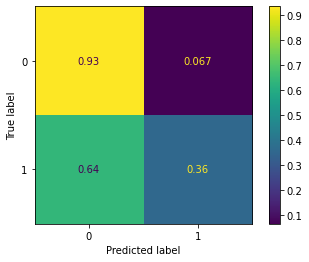

In [19]:
    # import the classifier
from sklearn.ensemble import RandomForestClassifier

    # Train/test split = 70/30 --- random_state 42
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 42)

    # First, we use **RandomForestClassiier**
clf = RandomForestClassifier(max_depth = 2, random_state = 123)

    # Train the classifier
clf.fit(train_X, train_y)

    # Make a prediction
prediction = clf.predict(test_X)

    # Evaluate the prediction
print('accuracy score: ', accuracy_score(y_true = test_y, y_pred = prediction))
plot_confusion_matrix(clf, test_X, test_y, normalize = 'true');

**RandomForest Classifier**

*   train/test: 70/30
*   Random state: 123


*   accuracy score:  0.7316
*   True Positives: 0.93
*   False Positives: 0.64
*   False Negatives: 0.067
*   True Negatives: 0.36

In [21]:
    # Classification Report
  
from sklearn.metrics import classification_report
print(classification_report(y_true = test_y, y_pred = prediction))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82       150
           1       0.74      0.36      0.48        81

    accuracy                           0.73       231
   macro avg       0.74      0.65      0.65       231
weighted avg       0.73      0.73      0.70       231



**Conclusion**
The F1 score shows is the best overall measure for accuracy of the model.

### Use other Classifiers

#### Logistic Regression Classifier

accuracy score:  0.7402597402597403


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


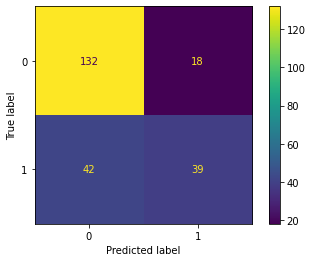

In [25]:
from sklearn.linear_model import LogisticRegression

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 123)
clf = LogisticRegression()
clf = clf.fit(train_X, train_y)
prediction = clf.predict(test_X)

print('accuracy score: ', accuracy_score(y_true=test_y, y_pred=prediction))
plot_confusion_matrix(clf, test_X, test_y);

**Logistic Regression**

* train/test: 70/30
* Random state: 123


* accuracy score: 0.7402
* True Positives: 132
* False Positives: 42
* False Negatives: 18
* True Negatives: 39

In [27]:
    # Classification Report
  
from sklearn.metrics import classification_report
print(classification_report(y_true=test_y, y_pred=prediction))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       150
           1       0.68      0.48      0.57        81

    accuracy                           0.74       231
   macro avg       0.72      0.68      0.69       231
weighted avg       0.73      0.74      0.73       231



**Conclusion**

The Logistic Regression Classifier performed better than the RandomTree Classifier, because the f1-score for the positive diagnosis higher.

Also its accuracy and averages perform better.

#### DecisionTree Classifier

0.6883116883116883


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


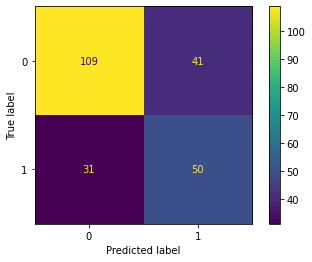

In [35]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 123)
clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(train_X, train_y) 
prediction = clf.predict(test_X)

print(accuracy_score(y_true=test_y, y_pred=prediction))
plot_confusion_matrix(clf, test_X, test_y);

**Logistic Regression**

* train/test: 70/30
* Random state: 123


* accuracy score: 0.7402
* True Positives: 109
* False Positives: 31
* False Negatives: 41
* True Negatives: 50

In [36]:
    # Classification Report
  
from sklearn.metrics import classification_report
print(classification_report(y_true=test_y, y_pred=prediction))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75       150
           1       0.55      0.62      0.58        81

    accuracy                           0.69       231
   macro avg       0.66      0.67      0.67       231
weighted avg       0.70      0.69      0.69       231



**Conclusion**
The DecisionTree Classifier performs the worst.

In [37]:
    # Classification Report
  
from sklearn.metrics import classification_report
print(classification_report(y_true=test_y, y_pred=prediction))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75       150
           1       0.55      0.62      0.58        81

    accuracy                           0.69       231
   macro avg       0.66      0.67      0.67       231
weighted avg       0.70      0.69      0.69       231



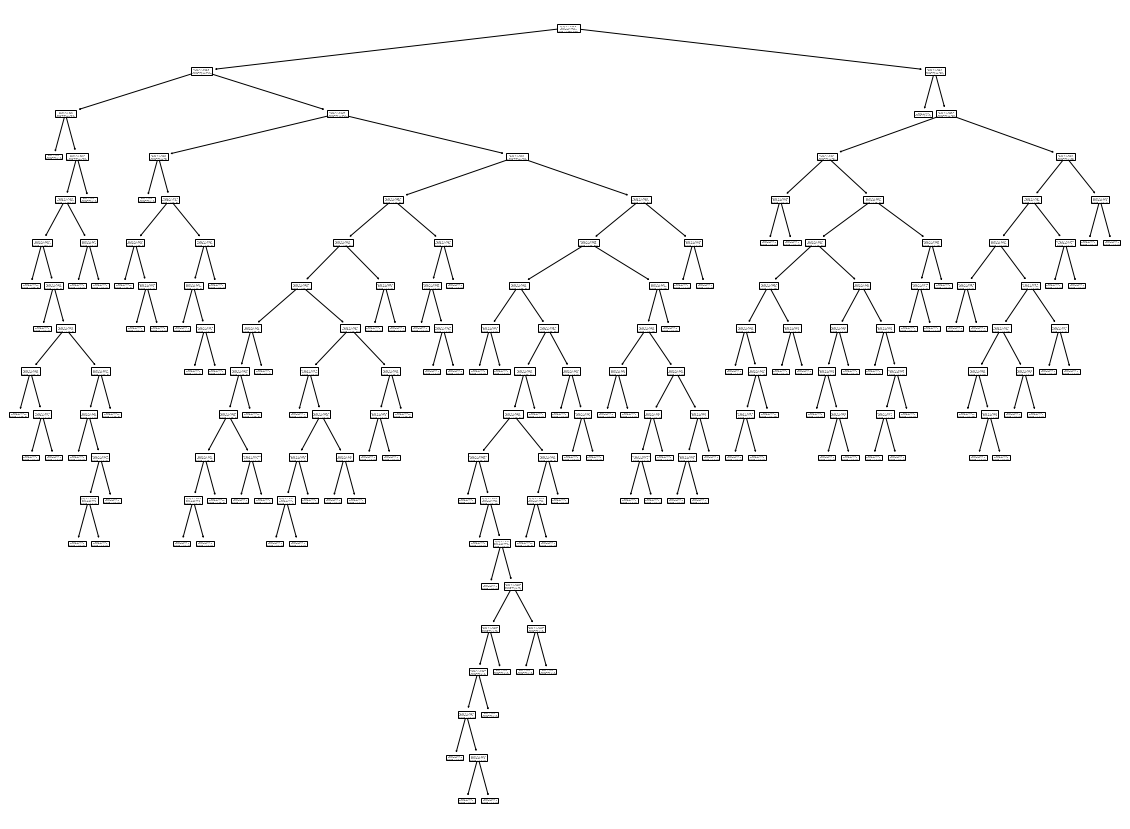

In [38]:
    # Decision Tree

fig_tree, ax = plt.subplots(figsize = (20,15))

tree.plot_tree(clf, ax=ax);

In [40]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


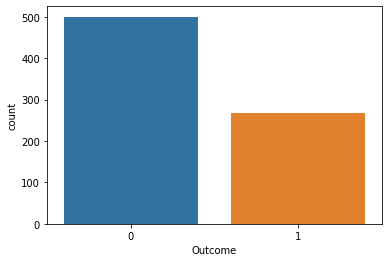

In [39]:
sns.countplot(y);

## Improving the performance of the model

The performance can or cannot be improved by changing 
* Random State:  here it doesn't give an improved prediction
* HyperParameter:  which I have not done here.
* Changing the Train/Test Split:  Changing it to 90/10 does improve the prediction, --- by giving it more training-data

### Changing the train/test split for the Logistic Regression Classifier.

accuracy score:  0.8051948051948052


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


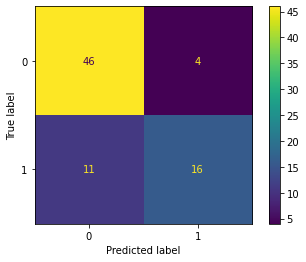

In [45]:
from sklearn.linear_model import LogisticRegression

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 123)
clf = LogisticRegression()
clf = clf.fit(train_X, train_y)
prediction = clf.predict(test_X)

print('accuracy score: ', accuracy_score(y_true=test_y, y_pred=prediction))
plot_confusion_matrix(clf, test_X, test_y);

**Logistic Regression**

* train/test: 90/10
* Random state: 123
* accuracy score: 0.80, improved fom 0.74


In [46]:
    # Classification Report
  
from sklearn.metrics import classification_report
print(classification_report(y_true=test_y, y_pred=prediction))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        50
           1       0.80      0.59      0.68        27

    accuracy                           0.81        77
   macro avg       0.80      0.76      0.77        77
weighted avg       0.80      0.81      0.80        77



**Conclusion**

Compaired with the first Logistic Regression Model, the recall and precision have gone up significantly, indicating that there are fewer false negatives and false positives.

Also the f1-scores habve improved across the board.

for reference;

Below a screengrab from the first Logistic Regression Classification Report. 


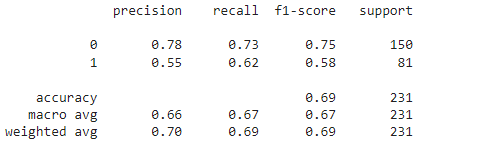

##  Prediction

In [41]:
    # Make a prediction
prediction = clf.predict(test_X)

    # Evaluate the prediction
print("Original Labels", test_y.values)
print("Labels Predicted", prediction)

Original Labels [0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0
 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0
 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1
 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0
 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0
 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0
 1 0 0 0 0 0 1 0 0]
Labels Predicted [0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0
 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0
 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1
 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0
 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1
 0 0 0 0 0 1 0 0 0]


### Question C.8 has not been attempted due to lack of time.

# Retinopathy

Produce a Neural Network to predict the diagnosis for Retinopathy based on an image.

In [47]:
    # enable GPU first (under Runtime and Runtime Type)
import torch
torch.cuda.is_available()

True

In [51]:
    # Check the GPU.
!nvidia-smi

Tue Jun 28 17:32:14 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [52]:
    # Install FastBook 
!pip install -Uqq fastbook
import fastbook
from fastbook import *

     |████████████████████████████████| 719 kB 31.1 MB/s 
     |████████████████████████████████| 4.4 MB 52.4 MB/s 
     |████████████████████████████████| 1.2 MB 58.0 MB/s 
     |████████████████████████████████| 362 kB 68.3 MB/s 
     |████████████████████████████████| 140 kB 73.4 MB/s 
     |████████████████████████████████| 1.1 MB 64.3 MB/s 
     |████████████████████████████████| 212 kB 65.9 MB/s 
     |████████████████████████████████| 101 kB 13.2 MB/s 
     |████████████████████████████████| 596 kB 57.3 MB/s 
     |████████████████████████████████| 127 kB 72.7 MB/s 
     |████████████████████████████████| 144 kB 75.0 MB/s 
     |████████████████████████████████| 271 kB 73.1 MB/s 
     |████████████████████████████████| 94 kB 4.3 MB/s 
     |████████████████████████████████| 6.6 MB 65.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.1

In [53]:
    # Import the data - 33 sec

path = untar_data("https://s3.gijs.me/summerschool/diabetes.zip")
# def return_label(x): return "cat" if x[0].isupper() else "dog"
# dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct=0.2, label_func=return_label, item_tfms=Resize(224))

dls = ImageDataLoaders.from_folder(path, valid_pct=0.2)

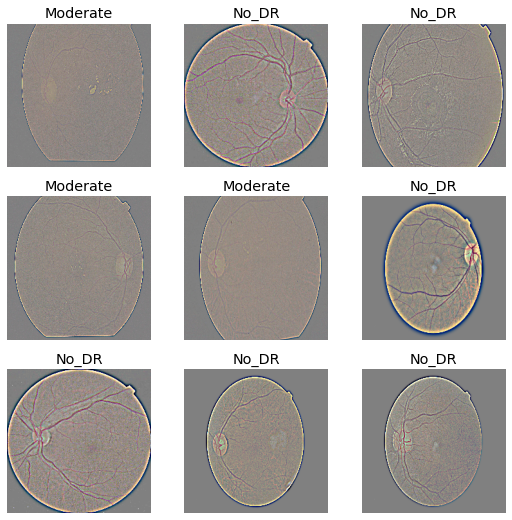

In [9]:
    # Visualise a batch from the training data
dls.train.show_batch()

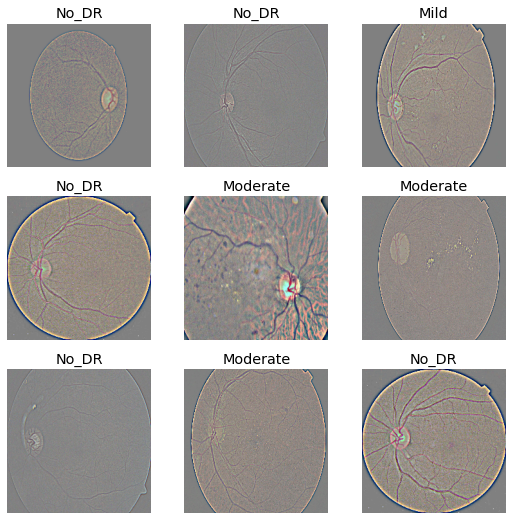

In [54]:
    # Visualise a batch from the validation data
dls.valid.show_batch()

## Training and Validation

In [55]:
    # Apply the vision_learner from AlexNet - 16 sec
learn = vision_learner(dls, alexnet, metrics=[accuracy])
learn.fit(1)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.202043,0.851062,0.725410,00:19


## Use different vision_learners

In [56]:
    # vgg16_bn
learn = vision_learner(dls, vgg16_bn, metrics=[accuracy])
learn.fit(1)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.140786,0.715387,0.751366,01:07


In [57]:
    # squeezenet1_0
learn = vision_learner(dls, squeezenet1_0, metrics=[accuracy])
learn.fit(1)

Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-b66bff10.pth


  0%|          | 0.00/4.78M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


epoch,train_loss,valid_loss,accuracy,time
0,1.109187,0.770923,0.719945,00:09


In [58]:
    # resnet18
learn = vision_learner(dls, resnet18, metrics=[accuracy])
learn.fit(1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.170762,0.837943,0.730874,00:12


In [59]:
    # xresnet18
learn = vision_learner(dls, xresnet18, metrics=[accuracy])
learn.fit(1)

Downloading: "https://s3.amazonaws.com/fast-ai-modelzoo/xrn50_940.pth" to /root/.cache/torch/hub/checkpoints/xrn50_940.pth


  0%|          | 0.00/244M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.144746,0.792631,0.674863,00:14


## Interpretation

vgg16_bn achieves the highest accuracy.

* We will run it again and perform the interpretation on this algorithm alone.
* also its values for training and validation losses are amongst the best.

In [60]:
    # run vgg16_bn again
    
learn = vision_learner(dls, vgg16_bn, metrics=[accuracy])
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,1.067599,0.695789,0.745902,01:09


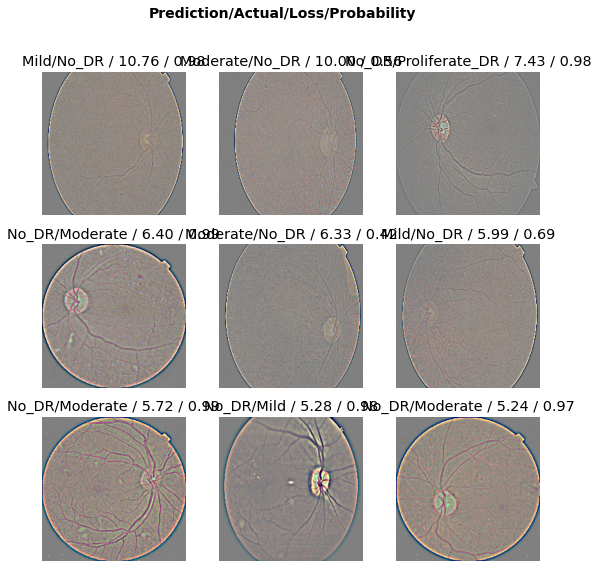

In [64]:
    # Classification Interpretation
    # these are the 9 worst mistakes.

interpretation=ClassificationInterpretation.from_learner(learn)
interpretation.plot_top_losses(9)

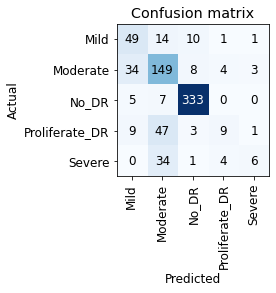

In [65]:
    # Confusion Matrix
interpretation.plot_confusion_matrix()

In [66]:
    # Classification Report
interpretation.print_classification_report()

                precision    recall  f1-score   support

          Mild       0.51      0.65      0.57        75
      Moderate       0.59      0.75      0.66       198
         No_DR       0.94      0.97      0.95       345
Proliferate_DR       0.50      0.13      0.21        69
        Severe       0.55      0.13      0.21        45

      accuracy                           0.75       732
     macro avg       0.62      0.53      0.52       732
  weighted avg       0.74      0.75      0.72       732



**Conclusion**

The algorithm is very good at predicting a negative diagnosis, but fails to identify positive cases.

A false-positive diagnosis, is preferred the false-negative one.  

In case of a false-negative, the patient's condition will deteriorate and more damage will be done.  

In case of a false-positive identification by the Machine Learning Model, the mistake will be caught once further investigation is carried out on the patient.

### ROC Curve

Roc Curve shows how quickly the model can get to the bottom.  The quicker, the better

The bigger the ROC area, the more accurately the model performs.

In [67]:
from sklearn.metrics import roc_curve, auc
predictions,actual_values,loss = learn.get_preds(with_loss=True)
probabilities = np.exp(predictions[:,1])
fpr, tpr, thresholds = roc_curve(actual_values, probabilities, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 0.8901089547156962


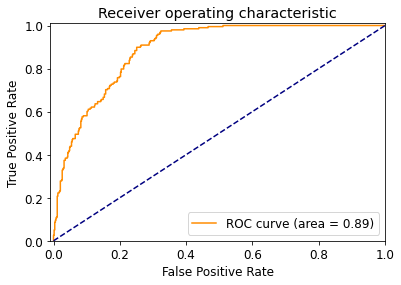

In [68]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

### Test

In [69]:
    # export the model to drive
    
learn.export("/content/export.pkl")

In [70]:
    # import the model to drive
    
learn = load_learner("/content/export.pkl")

In [71]:
    # test the model against a new image
download_url("https://drshinsblog.files.wordpress.com/2015/09/2015-03-24_22-08-18.jpg?w=768", 'reti.jpeg')
print("Image can be opened:", verify_image('reti.jpeg'))

Image can be opened: True


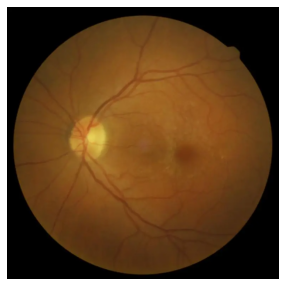

In [72]:
img = PILImage.create('reti.jpeg')
img.show()

In [73]:
    # Run the image through the model

prediction, target, probabilities = learn.predict(img)
print("Prediction:", prediction)
print("Probability:", probabilities.max().item())

Prediction: No_DR
Probability: 0.9599721431732178


**Conclusion**

Prediction is correct:  even though the eye in the image is diseased.
The despription with the image reads:

Epiretinal membrane results when a a thin fibrous tissue forms on the surface of the retina.  Trauma, inflammatory and vascular disease can cause epiretinal membranes.   Sometimes there is no underlying cause.

### Interpreting the Machine Learning Model

# What is going on inside the model.  Machine Learning behave like Black Boxes. One of the techniques to investigate what is going on insde is Shap.

### shap's Gradient Explainer

In [75]:
    # Import SHap's

!pip install -q shap
import shap

     |████████████████████████████████| 569 kB 11.1 MB/s 


In [76]:
    # We train Alexnet again 

learn = vision_learner(dls, alexnet, metrics=[accuracy])
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,1.158660,0.872425,0.714481,00:11


In [77]:
    # take a batch of training input, and feed it to the gradient explainer of shap. 
    # to visualise the gradient.

data, values = dls.train.one_batch()

explainer = shap.GradientExplainer(learn.model.cuda(), data[:60])
shap_values,indexes = explainer.shap_values(data[60:], ranked_outputs=2)

In [81]:
    # run this code to allow plotting

decoded_data = dls.train.decode((data, values))[0].permute(0,2,3,1).numpy()
shap_values = [np.transpose(s, (0,2,3,1)) for s in shap_values]
index_names = np.vectorize(lambda x: "dog" if x else "cat")(indexes.cpu().numpy())

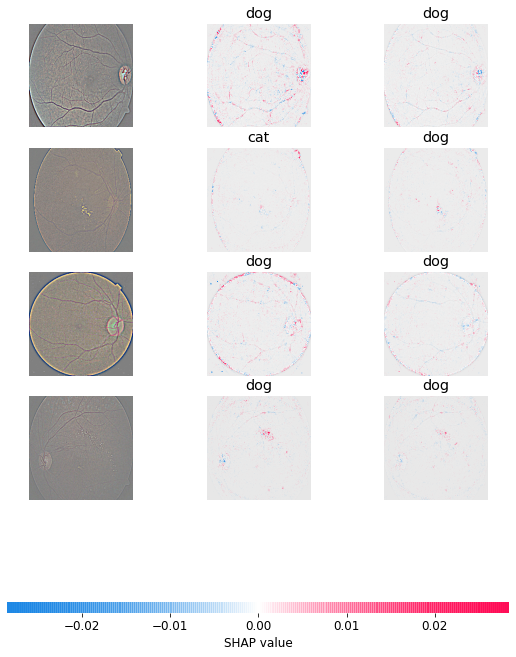

In [82]:
    # plot the shap data onto an image

shap.image_plot(shap_values, decoded_data[60:], index_names)

In the images, the red dots mean that the model attracts to those pixels, the values there are of more importance in recognizing it as Retinopathy.

# **Conclusions**

Compared with each other, although the Diabetes Algorithm achieves a better accuracy than the Retinopathy Model, it is harder to distinguish between a positive or a negative because the values for the data of the various diagnostic classes for Diabetes are too close. None of the classes provide a clear-cut yes or no, other than the Glucose levels.

This makes the Diabetes model less suited for diagnostic purposes than the Retinopathy Model. In the case of the Retinopathy Model, the model is less accurate, although it identifies the negative diagnosis very well, its false-diagnosis - either positive or negative - are fewer than with the Diabetes model, making it more suitable for diagnostic purposes than the Diabetes model.
